# The Fast Fourier Transform (FFT)

There's just one Fourier Transform, that shows up everywhere -- in continuous math, discrete math, everywhere.
Maybe in more MIT courses than any other algorithm (at least, before machine learning)

## Discrete Fourier Transform

With matrices:

$n \times n$ Fourier matrix: 

$$F_n = [e^{-2\pi i j k/n}]_{0 \le j < n, 0 \le k < n}$$

$$F_2 = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

Fourier transform: Given data $x \in \mathbf{C}^n$, $y = F_n x$ is the Fourier transform. Of course, it is not done this way! The matrix has a lot of structure and can be done in $n \log n$ steps.

In [ ]:
n = 4; [exp(-2 π * im * j * k / n)]

In [1]:
F(n) = fft(eye(n), 1)

F (generic function with 1 method)

In [2]:
using Interact

In [3]:
@manipulate for n in 1:10
    F(n)
end

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"n",5,1:10,"d",true)

5×5 Array{Complex{Float64},2}:
 1.0+0.0im        1.0+0.0im       …        1.0+0.0im     
 1.0+0.0im   0.309017-0.951057im      0.309017+0.951057im
 1.0+0.0im  -0.809017-0.587785im     -0.809017+0.587785im
 1.0+0.0im  -0.809017+0.587785im     -0.809017-0.587785im
 1.0+0.0im   0.309017+0.951057im      0.309017-0.951057im

In [4]:
using PyPlot

/Users/dpsanders/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Interact.Slider{Int64}(Signal{Int64}(26, nactions=0),"n",26,2:50,"d",true)

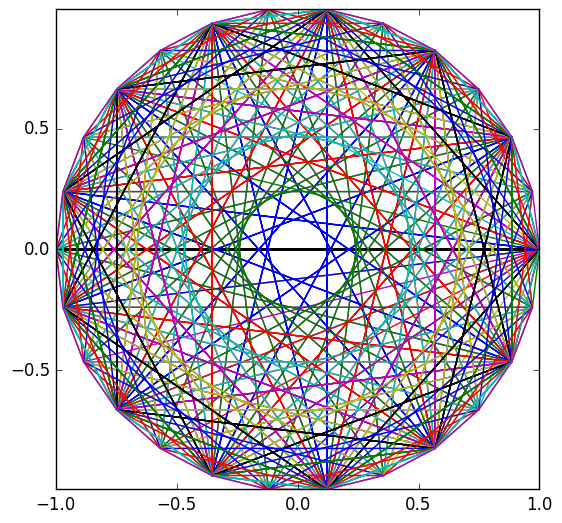

In [9]:
fig = figure()

@manipulate for n = 2:50
    withfig(fig) do
        for i in 1:n
            FF = F(n)[:,i]
            plot(real(FF), imag(FF))
            axis("image")
        end
    end
end

In [ ]:
fig = figure()

@manipulate for n = 2:50
    withfig(fig) do
        for i in 1:n
            FF = F(n)[:,i]
            plot(real(FF), imag(FF))
            axis("image")
        end
    end
end

## Taylor series using the FFT:

In [10]:
F8 = F(8)
r = F8[:, 2]  # 8 roots of unity

8-element Array{Complex{Float64},1}:
       1.0+0.0im     
  0.707107-0.707107im
       0.0-1.0im     
 -0.707107-0.707107im
      -1.0+0.0im     
 -0.707107+0.707107im
       0.0+1.0im     
  0.707107+0.707107im

In [18]:
ifft(exp.(r))

8-element Array{Complex{Float64},1}:
     1.00002+0.0im
         1.0+0.0im
         0.5+0.0im
    0.166667+0.0im
   0.0416667+0.0im
  0.00833333+0.0im
  0.00138889+0.0im
 0.000198413+0.0im

The main point of the $n \log n$ algorithm: $F_8$ is essentially made up of $F_4$s.

In [22]:
F(4)

4×4 Array{Complex{Float64},2}:
 1.0+0.0im   1.0+0.0im   1.0+0.0im   1.0+0.0im
 1.0+0.0im   0.0-1.0im  -1.0+0.0im   0.0+1.0im
 1.0+0.0im  -1.0+0.0im   1.0+0.0im  -1.0+0.0im
 1.0+0.0im   0.0+1.0im  -1.0+0.0im   0.0-1.0im

In [23]:
F(8)

8×8 Array{Complex{Float64},2}:
 1.0+0.0im        1.0+0.0im       …   1.0+0.0im        1.0+0.0im     
 1.0+0.0im   0.707107-0.707107im      0.0+1.0im   0.707107+0.707107im
 1.0+0.0im        0.0-1.0im          -1.0+0.0im        0.0+1.0im     
 1.0+0.0im  -0.707107-0.707107im      0.0-1.0im  -0.707107+0.707107im
 1.0+0.0im       -1.0+0.0im           1.0+0.0im       -1.0+0.0im     
 1.0+0.0im  -0.707107+0.707107im  …   0.0+1.0im  -0.707107-0.707107im
 1.0+0.0im        0.0+1.0im          -1.0+0.0im        0.0-1.0im     
 1.0+0.0im   0.707107+0.707107im      0.0-1.0im   0.707107-0.707107im

$$F_8[:, \mathrm{even columns, odd columns}] = \begin{bmatrix} F_4 & F_4 D_4 \\ F_4 & -F_4 D_4 \end{bmatrix}$$

The $D_4$s are called **twiddle factors**.

In [27]:
F8[:, [1, 3, 5, 7, 2, 4, 6, 8]][1:4, 1:4] == F(4)

true

In [29]:
F8[:, [1, 3, 5, 7, 2, 4, 6, 8]][5:8, 1:4] == F(4)

true

In [34]:
display(F8[:, [1, 3, 5, 7, 2, 4, 6, 8]][1:4, 5:8])

4×4 Array{Complex{Float64},2}:
       1.0+0.0im             1.0+0.0im       …        1.0+0.0im     
  0.707107-0.707107im  -0.707107-0.707107im      0.707107+0.707107im
       0.0-1.0im             0.0+1.0im                0.0+1.0im     
 -0.707107-0.707107im   0.707107-0.707107im     -0.707107+0.707107im

In [32]:
F(4)

4×4 Array{Complex{Float64},2}:
 1.0+0.0im   1.0+0.0im   1.0+0.0im   1.0+0.0im
 1.0+0.0im   0.0-1.0im  -1.0+0.0im   0.0+1.0im
 1.0+0.0im  -1.0+0.0im   1.0+0.0im  -1.0+0.0im
 1.0+0.0im   0.0+1.0im  -1.0+0.0im   0.0-1.0im

"Decimation in time or in frequency"